In [12]:
import os
import torch

from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json

import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
pred_df = pd.read_csv('/home/prml/StudentsWork/ChanYoung/cy_workspace/detr/output/rtdetr_r50vd_6x_coco/pred_iou.csv')

# pred_df.drop(columns=['pred_box', 'gt_box'], inplace=True)


pred_df['gt_ann_id'].fillna(-1, inplace=True)

pred_df['gt_ann_id'] = pred_df['gt_ann_id'].astype(int)
pred_df['gt_class'] = pred_df['gt_class'].astype(int)
pred_df.head()

/tmp/ipykernel_1785620/725093453.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pred_df['gt_ann_id'].fillna(-1, inplace=True)


,pred_score,pred_box,max_iou,pred_class,gt_class,gt_box,img_id,gt_ann_id
0,0.944702,"[385.4459228515625, 69.2581558227539, 499.3110...",0.958431,1,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
1,0.923389,"[30.2061767578125, 343.2093505859375, 99.80065...",0.946153,51,51,"[31.280000686645508, 344.0, 99.4000015258789, ...",397133,713388
2,0.899851,"[57.43772506713867, 288.3404235839844, 134.678...",0.920204,51,51,"[59.630001068115234, 287.3599853515625, 135.69...",397133,716434
3,0.859316,"[155.10549926757812, 168.65879821777344, 182.8...",0.922588,51,51,"[155.97000122070312, 168.9499969482422, 182.0,...",397133,1902250
4,0.811413,"[0.04127979278564453, 303.8897705078125, 85.81...",0.203642,51,51,"[31.280000686645508, 344.0, 99.4000015258789, ...",397133,713388


In [14]:
pred_df[pred_df['gt_ann_id'] == 200887]

,pred_score,pred_box,max_iou,pred_class,gt_class,gt_box,img_id,gt_ann_id
0,0.944702,"[385.4459228515625, 69.2581558227539, 499.3110...",0.958431,1,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
33,0.262773,"[471.37103271484375, 200.65017700195312, 499.1...",0.016696,81,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
39,0.238619,"[233.4029998779297, 157.73529052734375, 398.76...",0.020480,79,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
47,0.217539,"[477.189453125, 46.63612365722656, 484.6609191...",0.005777,50,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
56,0.199633,"[471.5902404785156, 203.3548583984375, 486.595...",0.007628,81,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
67,0.183816,"[404.8019104003906, 68.2471694946289, 415.3264...",0.018124,50,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
74,0.167902,"[396.62042236328125, 1.1238001585006714, 415.9...",0.007437,50,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
75,0.167836,"[402.27593994140625, 2.544825553894043, 415.81...",0.021934,50,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
87,0.149479,"[391.6882629394531, 77.49737548828125, 404.219...",0.025600,50,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887
92,0.146884,"[396.17010498046875, 1.9594547748565674, 414.8...",0.034751,50,1,"[388.6600036621094, 69.91999816894531, 498.070...",397133,200887


In [15]:
real_df = pd.read_csv('/home/prml/StudentsWork/ChanYoung/cy_workspace/detr/output/rtdetr_r50vd_6x_coco/real_iou.csv')

real_df.drop(columns=['pred_box', 'gt_box'], inplace=True)

real_df.head()

,pred_score,max_iou,pred_class,gt_class,gt_ann_id,gt_img_id
0,0.250545,0.920740,44,44,82445,397133
1,0.457435,0.950764,67,67,119568,397133
2,0.944702,0.958431,1,1,200887,397133
3,0.395103,0.883393,50,49,693231,397133
4,0.077901,0.951673,51,51,713388,397133


-------------------------------

In [16]:
pred_gt_anns = pred_df[(pred_df['max_iou'] >= 0.5) & (pred_df['pred_score'] >= 0.5)]['gt_ann_id'].unique()
len(pred_gt_anns)

23566

In [17]:
check_pred_gt_anns = pred_df[(pred_df['max_iou'] >= 0.5) & (pred_df['pred_score'] >= 0.0)]['gt_ann_id'].unique()
len(check_pred_gt_anns)

34390

In [18]:
real_gt_anns = real_df['gt_ann_id'].unique()
len(real_gt_anns)

36781

In [19]:
# recall은
len(pred_gt_anns) / len(real_gt_anns)

0.6407112367798592

In [20]:
pred_gt_anns = set(pred_df[(pred_df['max_iou'] >= 0.75) & (pred_df['pred_score'] >= 0.75)]['gt_ann_id'].unique())
miss_gt_anns = set(real_df[(real_df['max_iou'] >= 0.75) & (real_df['pred_score'] <= 0.75)]['gt_ann_id'].unique())

print(len(miss_gt_anns-pred_gt_anns) / len(miss_gt_anns))


0.7480743838028169


----------------------------------

In [23]:
miss_ann_ids = []
for ann_id in real_df[(real_df['pred_score'] < 0.5)]['gt_ann_id'].unique():
    check = pred_df[pred_df['gt_ann_id'] == ann_id]
    
    if check.empty or check['pred_score'].max() < 0.5:
        miss_ann_ids.append(ann_id)
    
print(len(miss_ann_ids))
print(len(miss_ann_ids)/len(real_df['gt_ann_id'].unique()))

11249
0.30583725292950165


In [26]:
extracted_df = pred_df[pred_df['gt_ann_id'].isin(miss_ann_ids)]
extracted_df

,pred_score,pred_box,max_iou,pred_class,gt_class,gt_box,img_id,gt_ann_id
19,0.424863,"[119.94818115234375, 272.1705322265625, 143.03...",0.916945,47,47,"[119.4000015258789, 272.510009765625, 144.2200...",397133,1878837
20,0.415171,"[0.12262344360351562, 163.8070068359375, 194.4...",0.724841,79,79,"[1.3600000143051147, 164.3300018310547, 193.91...",397133,1125079
21,0.395103,"[135.50140380859375, 249.3007049560547, 156.19...",0.883393,50,49,"[135.57000732421875, 249.42999267578125, 157.8...",397133,693231
22,0.359707,"[142.43505859375, 268.7095031738281, 173.18673...",0.906683,47,47,"[141.47000122070312, 267.9100036621094, 173.66...",397133,1883614
24,0.346206,"[0.39252281188964844, 198.08128356933594, 191....",0.773667,79,79,"[0.0, 210.89999389648438, 191.36000061035156, ...",397133,2139366
...,...,...,...,...,...,...,...,...
1499995,0.073159,"[37.43631362915039, 425.32171630859375, 101.45...",0.572807,50,51,"[0.2800000011920929, 429.5199890136719, 98.930...",15335,1538947
1499996,0.073056,"[0.556941032409668, 427.4491882324219, 101.433...",0.933956,77,51,"[0.2800000011920929, 429.5199890136719, 98.930...",15335,1538947
1499997,0.073033,"[-0.02445220947265625, 151.60372924804688, 561...",0.487683,65,63,"[2.059999942779541, 143.47999572753906, 547.09...",15335,98619
1499998,0.072823,"[16.15459442138672, 3.998744487762451, 522.982...",0.226777,63,1,"[343.6300048828125, 53.650001525878906, 511.25...",15335,1705756


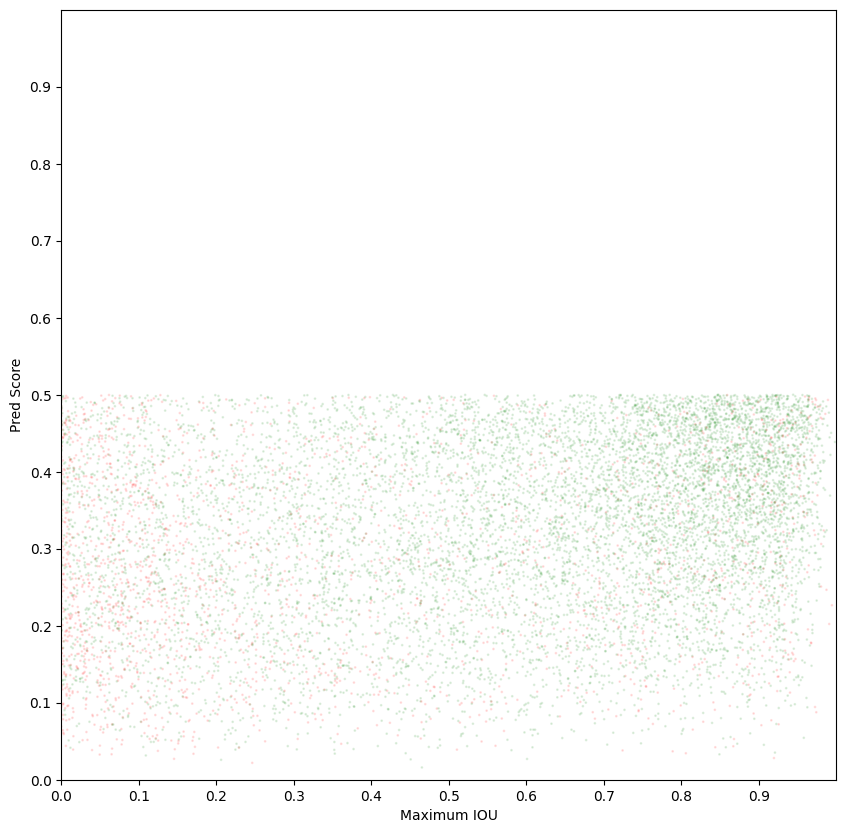

In [29]:
max_score_extracted_df = extracted_df.loc[extracted_df.groupby('gt_ann_id')['pred_score'].idxmax()]
max_score_extracted_df

fig, ax = plt.subplots(figsize=(10, 10))

x = max_score_extracted_df['max_iou'].values
y = max_score_extracted_df['pred_score'].values
color_array = np.where(max_score_extracted_df['gt_class'] == max_score_extracted_df['pred_class'], 'g', 'r')

ax.scatter(x, y, c=color_array, alpha=0.1, s=1)

ax.set(xlim=(0, 1), xticks=np.arange(0, 1, 0.1), ylim=(0, 1), yticks=np.arange(0, 1, 0.1))

ax.set_xlabel('Maximum IOU')
ax.set_ylabel('Pred Score')

plt.show()

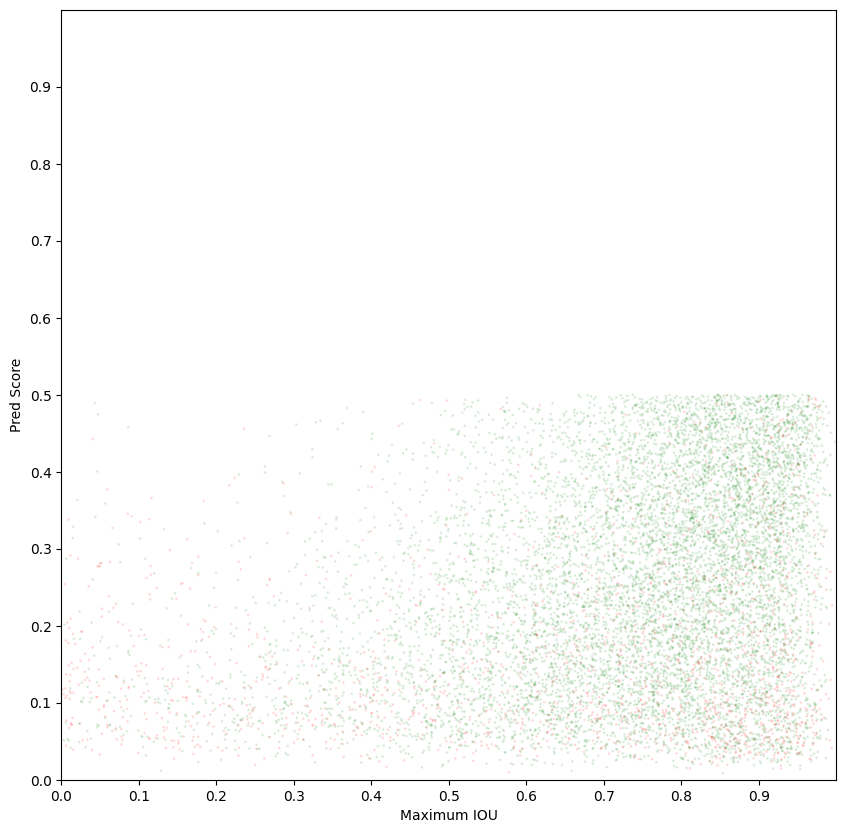

In [33]:
max_IoU_extracted_df = extracted_df.loc[extracted_df.groupby('gt_ann_id')['max_iou'].idxmax()]
max_IoU_extracted_df

fig, ax = plt.subplots(figsize=(10, 10))

x = max_IoU_extracted_df['max_iou'].values
y = max_IoU_extracted_df['pred_score'].values
color_array = np.where(max_IoU_extracted_df['gt_class'] == max_IoU_extracted_df['pred_class'], 'g', 'r')

ax.scatter(x, y, c=color_array, alpha=0.1, s=1)

ax.set(xlim=(0, 1), xticks=np.arange(0, 1, 0.1), ylim=(0, 1), yticks=np.arange(0, 1, 0.1))

ax.set_xlabel('Maximum IOU')
ax.set_ylabel('Pred Score')

plt.show()

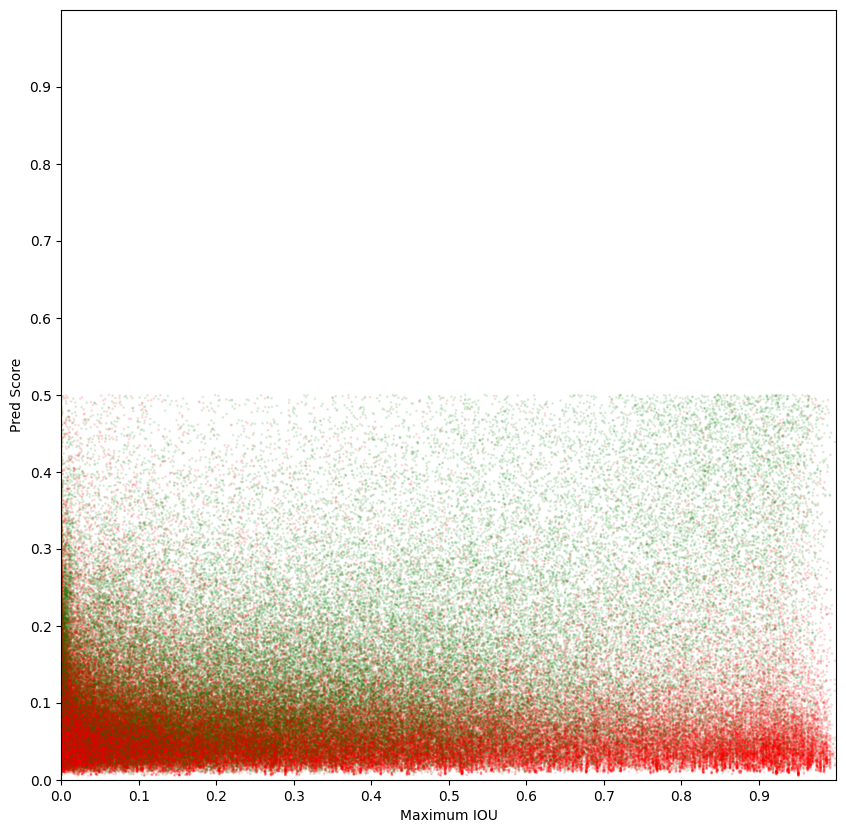

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

x = extracted_df['max_iou'].values
y = extracted_df['pred_score'].values
color_array = np.where(extracted_df['gt_class'] == extracted_df['pred_class'], 'g', 'r')

ax.scatter(x, y, c=color_array, alpha=0.1, s=1)

ax.set(xlim=(0, 1), xticks=np.arange(0, 1, 0.1), ylim=(0, 1), yticks=np.arange(0, 1, 0.1))

ax.set_xlabel('Maximum IOU')
ax.set_ylabel('Pred Score')

plt.show()
